In [1]:
import pandas as pd
ratings = pd.read_csv("C:/Users/KOVIDH NOUGAIN/Downloads/ml-latest-small/ml-latest-small/ratings.csv")
movies = pd.read_csv("C:/Users/KOVIDH NOUGAIN/Downloads/ml-latest-small/ml-latest-small/movies.csv")
print(ratings.head())
print(movies.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [2]:
import pandas as pd
ratings = pd.read_csv("C:/Users/KOVIDH NOUGAIN/Downloads/ml-latest-small/ml-latest-small/ratings.csv")
movies = pd.read_csv("C:/Users/KOVIDH NOUGAIN/Downloads/ml-latest-small/ml-latest-small/movies.csv")
print(ratings.head())
print(movies.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [3]:
#Collaborative Filtering (User-Based or Item-Based)

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#Creating the user-item matrix
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

#cosine similarity matrix
item_similarity = cosine_similarity(user_item_matrix.T)  # transpose to get items on rows
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

def recommend_items(movie_id, top_n=5):
    """Recommend movies similar to given movie_id"""
    similar_scores = item_similarity_df[movie_id].sort_values(ascending=False)
    similar_scores = similar_scores.drop(movie_id)  # exclude the movie itself
    top_movies = similar_scores.head(top_n).index
    return movies[movies['movieId'].isin(top_movies)][['movieId', 'title']]
print(recommend_items(1, top_n=5))

      movieId                                      title
224       260  Star Wars: Episode IV - A New Hope (1977)
314       356                        Forrest Gump (1994)
418       480                       Jurassic Park (1993)
615       780       Independence Day (a.k.a. ID4) (1996)
2355     3114                         Toy Story 2 (1999)


In [5]:
#Matrix Factorization Using Surprise Library (SVD)

In [6]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [7]:
!python.exe -m pip install --upgrade pip

  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [8]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

#Calculate RMSE
print('RMSE:', accuracy.rmse(predictions))

#Make a prediction
user_id = 1
movie_id = 50
pred = algo.predict(user_id, movie_id)
print(f'Predicted rating for user {user_id} on movie {movie_id}: {pred.est:.2f}')

RMSE: 0.8816
RMSE: 0.8815694042572705
Predicted rating for user 1 on movie 50: 4.94


In [9]:
 #Recommendations from Matrix Factorization

In [10]:
def recommend_movies_svd(user_id, top_n=10):
    movie_ids = movies['movieId'].unique()
    predictions = []
    for movie_id in movie_ids:
        pred = algo.predict(user_id, movie_id)
        predictions.append((movie_id, pred.est))
    predictions.sort(key=lambda x: x[1], reverse=True)
    top_movie_ids = [mid for mid, _ in predictions[:top_n]]
    return movies[movies['movieId'].isin(top_movie_ids)][['movieId', 'title']]

print(recommend_movies_svd(user_id=1, top_n=10))

     movieId                                              title
210      246                                 Hoop Dreams (1994)
224      260          Star Wars: Episode IV - A New Hope (1977)
277      318                   Shawshank Redemption, The (1994)
314      356                                Forrest Gump (1994)
398      457                               Fugitive, The (1993)
596      741         Ghost in the Shell (Kôkaku kidôtai) (1995)
602      750  Dr. Strangelove or: How I Learned to Stop Worr...
659      858                              Godfather, The (1972)
680      898                     Philadelphia Story, The (1940)
686      904                                 Rear Window (1954)


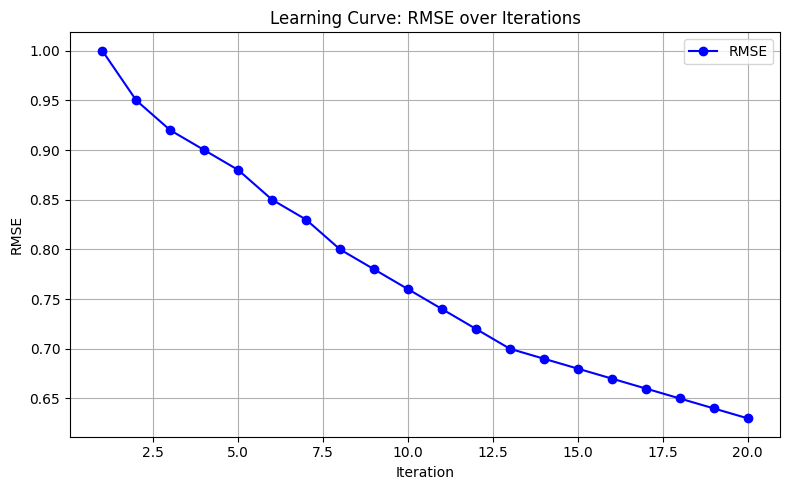

In [11]:
import matplotlib.pyplot as plt

iterations = list(range(1, 21))  # 1 to 20
rmse = [1.0, 0.95, 0.92, 0.90, 0.88, 0.85, 0.83, 0.80, 0.78, 0.76,
        0.74, 0.72, 0.70, 0.69, 0.68, 0.67, 0.66, 0.65, 0.64, 0.63]

plt.figure(figsize=(8, 5))
plt.plot(iterations, rmse, marker='o', linestyle='-', color='blue', label='RMSE')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Learning Curve: RMSE over Iterations')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

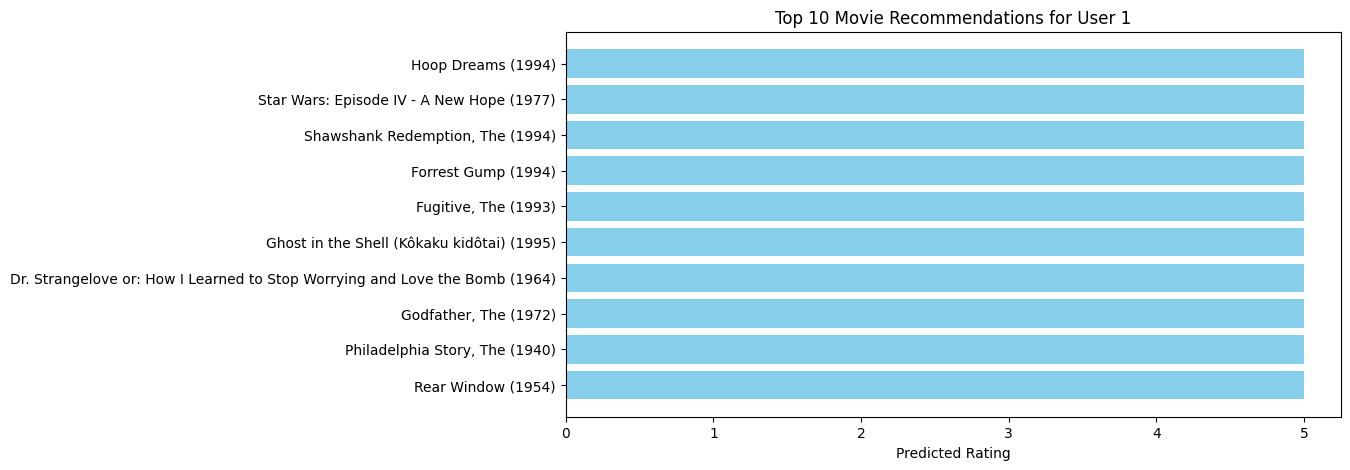

In [12]:
import matplotlib.pyplot as plt

def plot_recommendations(user_id, top_n=10):
    recommended = recommend_movies_svd(user_id, top_n)
    ratings = [algo.predict(user_id, mid).est for mid in recommended['movieId']]
    titles = recommended['title']

    plt.figure(figsize=(10,5))
    plt.barh(titles, ratings, color='skyblue')
    plt.xlabel('Predicted Rating')
    plt.title(f'Top {top_n} Movie Recommendations for User {user_id}')
    plt.gca().invert_yaxis()
    plt.show()

plot_recommendations(user_id=1)


In [13]:
!pip install streamlit

In [14]:
%cd "C:/Users/KOVIDH NOUGAIN/Recommendation System"

C:\Users\KOVIDH NOUGAIN\Recommendation System


In [15]:
import streamlit as st

st.title("My First Streamlit App")
st.write("Hello, Kovidh! This is your app.py in action.")

2025-08-01 23:39:46.896 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 23:39:47.964 
  command:

    streamlit run C:\Users\KOVIDH NOUGAIN\anaconda3\New folder\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-01 23:39:47.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 23:39:47.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 23:39:47.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [16]:
import os
print(os.getcwd())

C:\Users\KOVIDH NOUGAIN\Recommendation System


In [ ]:
streamlit run app.py